<a href="https://colab.research.google.com/github/claudiaesnarrizaga/SISTEMAS-DE-CONTROL/blob/main/PROYECTO_FINAL_SISTEMAS_DE_CONTROL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROYECTO FINAL SISTEMAS DE CONTROL**
##**Inverted Pendulum Stabilization using PID Control**

**Nombre: Claudia Esnarrizaga Rodríguez**

**Fecha: 08/04/2024**

**Curso: 3ºB Ingeniería Matemática**

## **1. OBJETIVO**

El objetivo del proyecto final es diseñar y simular un sistema de control para estabilizar un péndulo invertido utilizando un controlador PID (Proporcional-Integral-Derivativo) en Python, mientras se exploran temas adicionales relacionados con el tema.

## **2. DESCRIPCIÓN DEL PROYECTO**

###**2.1 Modelado**

El sistema del péndulo invertido puede ser modelado utilizando las siguientes ecuaciones de movimiento:

\begin{equation}
\ddot{\theta} = \frac{g}{l} \sin \theta + \frac{u}{ml^2} \quad (1)
\end{equation}

\begin{equation}
\dot{\omega} = \ddot{\theta} \quad (2)
\end{equation}

donde $\theta$ es el ángulo del péndulo, $\omega$ es la velocidad angular, $g$ es la aceleración debido a la gravedad, $l$ es la longitud del péndulo, $m$ es la masa del péndulo y $u$ es la entrada de control.

Al linealizar el modelo alrededor del punto de equilibrio ($\theta = 0$, $\omega = 0$) y aplicar Laplace, obtenemos la función de transferencia:

\begin{equation}
G(s) = \frac{\Theta(s)}{U(s)} = \frac{1}{s^2 - \frac{g}{l}}
\end{equation}


[6] Imagen

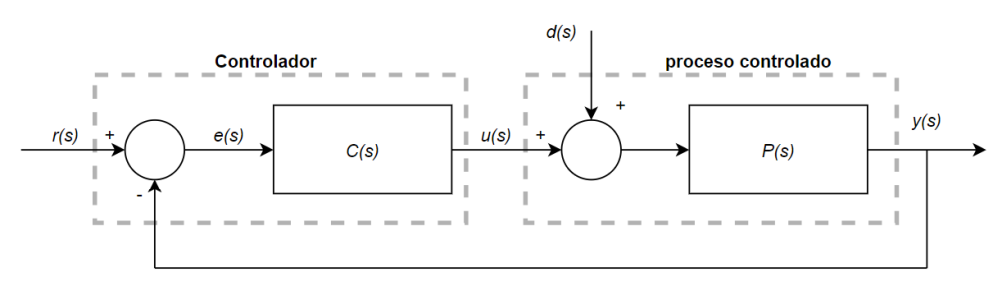

Instalemos e importemos todas las librerías necesarias:

In [1]:
!pip install control

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 513.9/513.9 kB 6.8 MB/s eta 0:00:00


In [2]:
import numpy as np
import control as ctrl
import matplotlib.pyplot as plt

Definamos los parámetros de nuestro sistema.

In [3]:
g = 9.81  # Aceleración debido a la gravedad (m/s^2)
l = 1.0   # Longitud del péndulo (m)
m = 1.0   # Masa del péndulo (kg)

Definamos la función de transferencia del sistema.

In [4]:
num = [1]
den = [1, 0, -g/l]
G = ctrl.TransferFunction(num, den)

Diseñemos nuestro controlador.

In [5]:
Kp = 100  # Ganancia proporcional
Ki = 10   # Ganancia integral
Kd = 20   # Ganancia derivativa
controlador = ctrl.TransferFunction([Kd, Kp, Ki], [1, 0])

A continuación vamos a crear nuestro sistema de lazo cerrado.

In [6]:
sistema = ctrl.feedback(controlador * G, sign=-1)

#### **Simulación de la respuesta del sistema**

In [7]:
t = np.linspace(0, 50, 1000)
t, y = ctrl.step_response(sistema, T=t)

Grafiquemos la respuesta de la simulación:

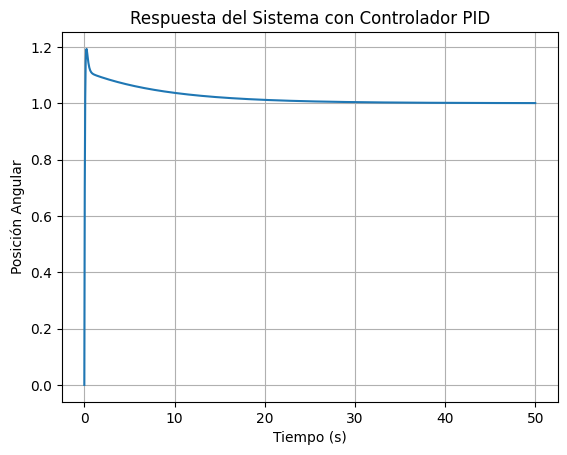

In [8]:
plt.plot(t, y)
plt.title('Respuesta del Sistema con Controlador PID')
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición Angular')
plt.grid(True)
plt.show()

Podemos observar que se estabiliza pasados los 30 segundos más o menos.

### **2.2 Análisis de estabilidad**

El análisis de estabilidad del sistema del péndulo invertido se puede llevar a cabo utilizando el método de Routh-Hurwitz. La ecuación característica del sistema es:

\begin{equation}
s^2 - \frac{g}{l} = 0 \quad (4)
\end{equation}

Para que el sistema sea estable, todas las raíces de la ecuación característica deben tener partes reales negativas. Se puede determinar el rango de parámetros del sistema para garantizar la estabilidad.

Calculemos los polos del sistema.

In [9]:
poles = ctrl.poles(G)

print("Polos del sistema:", poles)

Polos del sistema: [-3.13209195+0.j  3.13209195+0.j]


Los polos solo tienen parte real, no tienen parte compleja.

Verifiquemos la estabilidad utilizando el criterio de Routh-Hurwitz. [1]

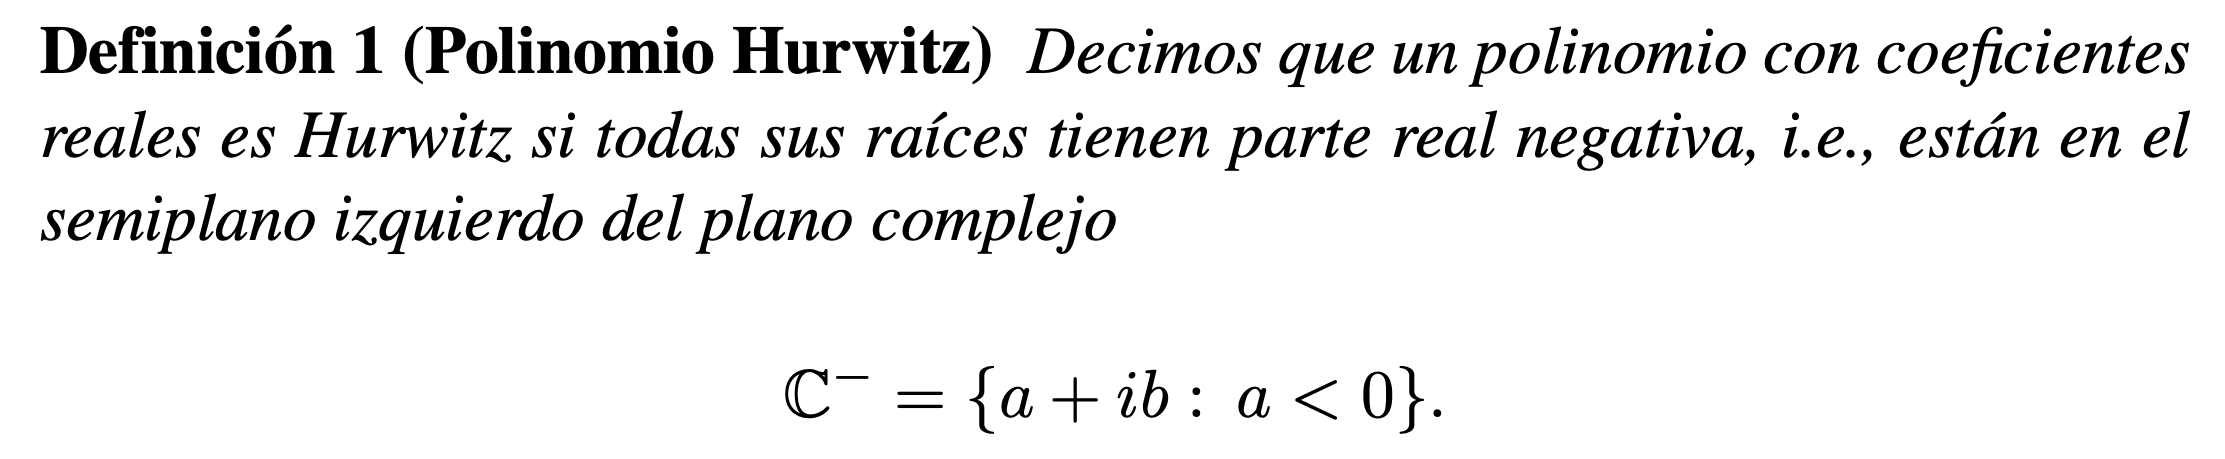

In [10]:
if all(p.real < 0 for p in poles):
    print("El sistema es estable según el criterio de Routh-Hurwitz.")
else:
    print("El sistema puede no ser estable según el criterio de Routh-Hurwitz.")

El sistema puede no ser estable según el criterio de Routh-Hurwitz.


Efectivamente, como nos sale un polo con parte real positiva, el sistema puede ser inestable.

Grafiquemos los puntos para ver dónde están situados.

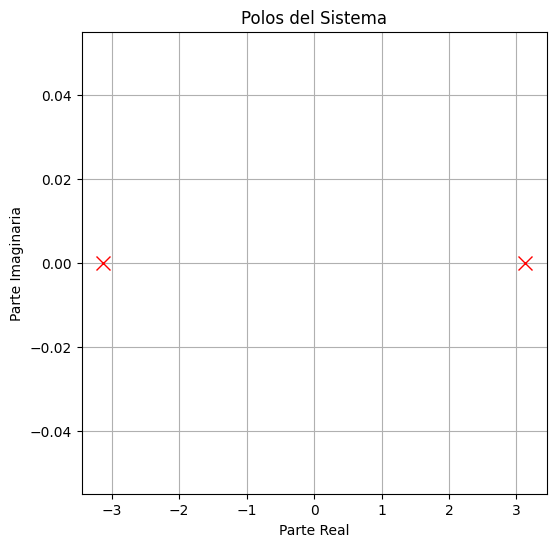

In [11]:
plt.figure(figsize=(6, 6))
plt.plot(np.real(poles), np.imag(poles), 'rx', markersize=10)
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginaria')
plt.title('Polos del Sistema')
plt.grid(True)
plt.show()

Como hemos podido deducir anteriormente, tenemos un polo en la parte negativa del eje Real y otro en la positiva. Este último es el que nos puede desestabilizar el sistema.

### **2.3 Diseño del Controlador PID**

El controlador PID puede ser diseñado utilizando la siguiente ley de control:
$$ u(t) = K_p e(t) + K_i \int_{0}^{t} e(\tau) d\tau + K_d \frac{d}{dt} e(t) \quad (5) $$
donde $ e(t) = \theta_d - \theta(t) $ es la señal de error, $ \theta_d $ es el ángulo deseado (punto de consigna), y $ K_p $, $ K_i $ y $ K_d $ son las ganancias proporcional, integral y derivativa, respectivamente.
Las ganancias pueden ser determinadas utilizando técnicas como Ziegler-Nichols o ajustándolas manualmente para lograr el rendimiento deseado.

A continuación representaremos el diseño de un controlador PID para estabilizar el péndulo invertido, usando los datos proporcionados en el ejemplo.

In [12]:
# Ganancias del controlador PID
Kp = 10
Ki = 1
Kd = 2

Diseñemos nuestro controlador PID con las ganancias definidas:

In [13]:
controlador = ctrl.TransferFunction([Kd, Kp, Ki], [1, 0])
print("Controlador PID:")
print(controlador)

Controlador PID:
<TransferFunction>: sys[6]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


2 s^2 + 10 s + 1
----------------
       s



A continuación usaré la técnica de Ziegler-Nichols para determinar las ganancias, sería una forma más precisa de realizar el ejercicio, en vez de ir ajustándolo manualmente, sobre todo si no sabemos de dónde partir.

La técnica de Ziegler-Nichols es un método de sintonización de controladores PID que se basa en realizar una prueba de paso en el sistema controlado para determinar los parámetros críticos: la ganancia crítica (Ku) y el período crítico (Pu). Estos parámetros se utilizan luego para calcular las ganancias del controlador PID: la ganancia proporcional (Kp), la ganancia integral (Ki) y la ganancia derivativa (Kd). Las reglas de Ziegler-Nichols proporcionan relaciones empíricas para calcular estas ganancias en función de Ku y Pu. Este método es útil para obtener una configuración inicial del controlador PID y puede ser refinado posteriormente mediante ajustes manuales o métodos de optimización adicionales. [2]

In [14]:
# Método de Ziegler-Nichols y Cohen-Coon
Ku = 50  # Ganancia crítica
Tu = 30  # Periodo de oscilación obtenido gráficamente

Las ecuaciones utilizadas para calcular las ganancias del controlador PID (Kp, Ki, Kd) son las reglas de Ziegler-Nichols para el método de sintonización de controladores PID a partir de los parámetros obtenidos en la prueba de paso.

Estas ecuaciones son parte de las reglas clásicas de Ziegler-Nichols, que proporcionan una forma de estimar las ganancias del controlador PID a partir de la ganancia crítica (Ku) y el período crítico (Pu) obtenidos durante la prueba de paso.

En estas reglas:
- La ganancia proporcional (Kp) se calcula como un porcentaje (0.6) de la ganancia crítica (Ku).
- La ganancia integral (Ki) se calcula multiplicando dos veces la ganancia proporcional (Kp) y dividiendo por el período crítico (Pu).
- La ganancia derivativa (Kd) se calcula como la ganancia proporcional (Kp) multiplicada por el período crítico (Pu) y dividida por 8.

Estas ecuaciones proporcionan una configuración inicial del controlador PID que puede ser ajustada posteriormente según sea necesario para optimizar el rendimiento del sistema controlado.

[3] Imagen

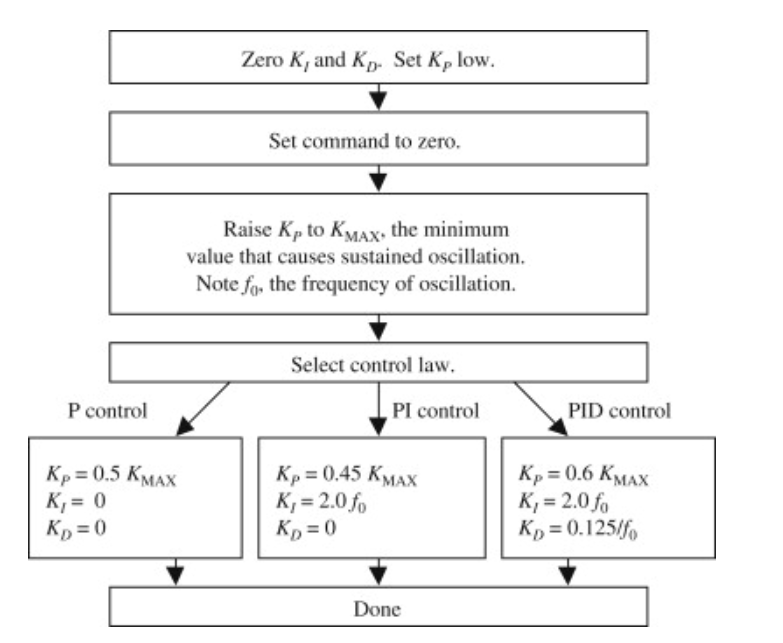

[4] Tabla

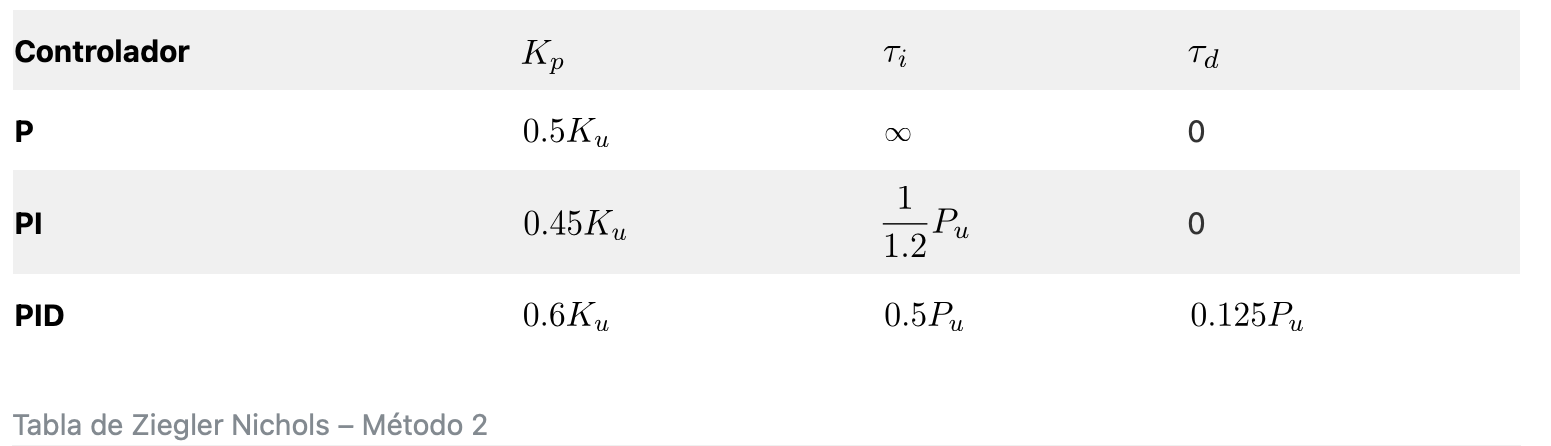

In [15]:
# Ganancias del controlador PID según la técnica de Ziegler-Nichols y Cohen-Coon
# Ajuste de las ganancias del controlador PID
Kp_zn = 0.6 * Ku
Ki_zn = 0.5 * Tu
Kd_zn = 0.125 * Tu

# Imprimir los valores de las ganancias
print("Ganancias del controlador PID (Ziegler-Nichols):")
print("Kp =", Kp_zn)
print("Ki =", Ki_zn)
print("Kd =", Kd_zn)

Ganancias del controlador PID (Ziegler-Nichols):
Kp = 30.0
Ki = 15.0
Kd = 3.75


Diseñemos nuestro controlador PID con las ganancias que nos ha proporcionado la técnica descrita anteriormente:

In [16]:
controlador_zn = ctrl.TransferFunction([Kd_zn, Kp_zn, Ki_zn], [1, 0])
print("Controlador PID:")
print(controlador_zn)

Controlador PID:
<TransferFunction>: sys[7]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


3.75 s^2 + 30 s + 15
--------------------
         s



He intentado investigar una manera para hallar el periodo y ganancia críticos de forma analítica. Por lo visto, hay una, pero para ello necesitamos tener parte compleja en los polos porque sino nuestro sistema sería indefenido. A continuación dejaré el procedimiento que he intentado seguir guiándome de [5]:

Dados los polos del sistema:

$\text{Polos del sistema: } [-3.13209195+0j, \, 3.13209195+0j]$

Podemos usar la siguiente relación para encontrar la frecuencia natural $\omega_n$ y el coeficiente de amortiguamiento $\zeta$:

1. **Frecuencia natural $\omega_n$**: La frecuencia natural está dada por la parte imaginaria de los polos. Para un sistema de segundo orden, la frecuencia natural es la mitad de la frecuencia de oscilación.

   $\omega_n = \frac{|\text{Im}(p_1)|}{2}$

2. **Coeficiente de amortiguamiento $\zeta$**: El coeficiente de amortiguamiento se puede encontrar utilizando la siguiente fórmula:

   $\zeta = -\frac{\text{Re}(p_1)}{\omega_n}$

Donde $p_1$ es el polo dominante del sistema, que es el polo con parte imaginaria máxima.

Vamos a calcular estos valores con los datos proporcionados:

Dado que los polos del sistema son complejos conjugados:

$p_1 = -3.13209195 + 0j$
$p_2 = 3.13209195 + 0j$

Podemos identificar $p_1$ como el polo dominante, ya que tiene la parte imaginaria máxima. Entonces, utilizaremos $p_1$ para calcular la frecuencia natural $\omega_n$ y el coeficiente de amortiguamiento $\zeta$.

1. **Frecuencia natural $\omega_n$**:
   $\omega_n = \frac{| \text{Im}(p_1) |}{2}$

   Aquí, $\text{Im}(p_1)$ representa la parte imaginaria de $p_1$, que es $0 $. Por lo tanto, $\omega_n = 0$.

2. **Coeficiente de amortiguamiento $\zeta$**:
   $\zeta = -\frac{\text{Re}(p_1)}{\omega_n}$

   Dado que $\omega_n = 0 $, el coeficiente de amortiguamiento $\zeta$ será indefinido.

Esto sugiere que el sistema no tiene un comportamiento típico de segundo orden, ya que la frecuencia natural es cero y el coeficiente de amortiguamiento es indefinido. Esto podría deberse a que los polos del sistema están en el eje imaginario, lo que indica una oscilación puramente armónica sin amortiguamiento. Por lo tanto, el sistema puede no ser representable adecuadamente como un sistema de segundo orden.

Dado que el sistema no se comporta como un sistema de segundo orden típico, no podemos aplicar directamente los métodos convencionales de sintonización de controladores PID, como el método de Ziegler-Nichols, para determinar los valores de $K_u$ y $T_u$. Estos métodos se basan en la respuesta del sistema a una entrada escalón unitario y requieren que el sistema se comporte como un sistema de segundo orden.

Sin embargo, voy realizar ajustes utilizando métodos de prueba y error. Estas técnicas pueden incluir el ajuste de ganancias utilizando métodos de optimización o ajuste de modelo, como el método de ajuste de mínimos cuadrados.

Otra opción sería modificar el modelo del sistema para que se adapte a un modelo de segundo orden y luego aplicar métodos de sintonización convencionales. Esto podría implicar simplificar el modelo o realizar aproximaciones que permitan representar el sistema como un sistema de segundo orden. Sin embargo, es importante recordar que estas aproximaciones pueden introducir cierto grado de error en el modelado del sistema y en la sintonización del controlador.

### **2.4 Simulación**

El sistema en lazo cerrado puede ser simulado utilizando bibliotecas de Python como NumPy, SciPy y Matplotlib. Se puede observar la respuesta del sistema a diferentes condiciones iniciales y perturbaciones.

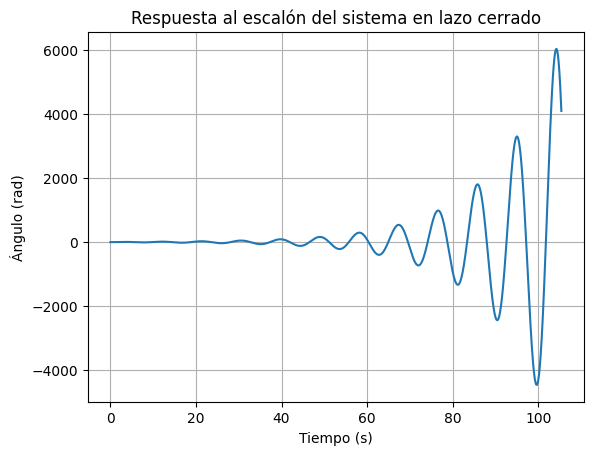

In [17]:
# Sistema en lazo cerrado
closed_loop = ctrl.feedback(G * controlador)

# Respuesta en el tiempo
t, y = ctrl.step_response(closed_loop)

# Graficar
plt.plot(t, y)
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (rad)')
plt.title('Respuesta al escalón del sistema en lazo cerrado')
plt.grid(True)
plt.show()

Podemos observar que para este caso no se nos estabiliza nunca, de hecho, se nos desestabiliza más a medida que avanzamos en el tiempo.

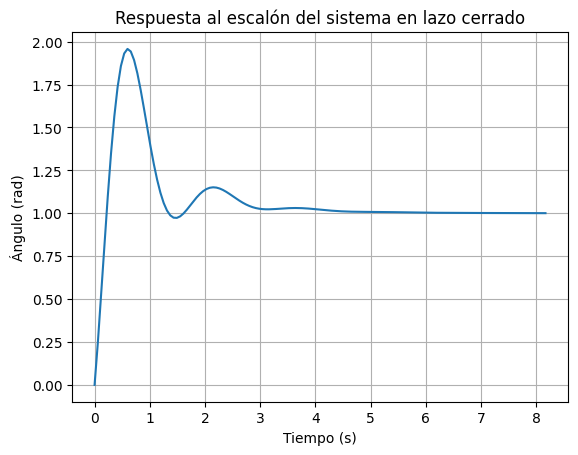

In [18]:
# Sistema en lazo cerrado Ziegler-Nichols
closed_loop_zn = ctrl.feedback(G * controlador_zn)

# Respuesta en el tiempo
t_zn, y_zn = ctrl.step_response(closed_loop_zn)

# Graficar
plt.plot(t_zn, y_zn)
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (rad)')
plt.title('Respuesta al escalón del sistema en lazo cerrado')
plt.grid(True)
plt.show()

Vemos que el sistema se nos estabiliza a partir de, más o menos, los 4.5 segundos.

### **2.5 Análisis de Desempeño**
El desempeño del sistema controlado puede ser analizado en términos de tiempo de establecimiento, sobreimpulso y error en estado estacionario. También se puede investigar la robustez del controlador frente a variaciones en los parámetros y ruido.

In [19]:
#Calcular tiempo de establecimiento
settling_time_zn = t_zn[np.where(np.abs(y_zn - 1) < 0.02)[0][-1]]

# Calcular sobreimpulso
overshoot_zn = max(y_zn) - 1

# Calcular error en estado estacionario
steady_state_error_zn = abs(1 - y_zn[-1])

In [20]:
# Imprimir resultados
print("Tiempo de establecimiento:", settling_time_zn)
print("Sobreimpulso:", overshoot_zn)
print("Error en estado estacionario:", steady_state_error_zn)

Tiempo de establecimiento: 8.166584119246147
Sobreimpulso: 0.9572961695160531
Error en estado estacionario: 0.0005641379030822957



1. **Tiempo de Establecimiento $T_s$**: El sistema tarda aproximadamente $8.17$ unidades de tiempo en alcanzar y permanecer dentro de una banda específica alrededor del valor de referencia después de una perturbación o cambio en la entrada.
  
2. **Sobreimpulso $M_p$**: El sistema tiene un sobreimpulso del $95.73 \%$, lo que significa que el máximo porcentaje de sobrepaso de la respuesta del sistema con respecto al valor de referencia después de una perturbación es aproximadamente del $95.73 \% $.

3. **Error en Estado Estacionario $e_{ss}$**: El valor final del error entre la salida del sistema y el valor de referencia después de que el sistema se ha estabilizado es aproximadamente $0.00056$.

#### **Análisis de la Robustez**
1. **Variaciones en los Parámetros**: Podemos investigar cómo varía el desempeño del sistema controlado cuando los parámetros del sistema o del controlador son modificados. En este caso, podríamos analizar cómo cambian el tiempo de establecimiento, el sobreimpulso y el error en estado estacionario cuando se ajustan las ganancias del controlador PID o los parámetros del sistema.

2. **Ruido**: También podemos estudiar cómo responde el sistema controlado ante la presencia de ruido en las mediciones o en la señal de control. Podríamos simular la presencia de ruido en las señales de entrada y salida del sistema y analizar cómo afecta al desempeño del controlador.

Para realizar un análisis más detallado, podríamos simular variaciones en las ganancias del controlador PID o en los parámetros del sistema y observar cómo afectan al tiempo de establecimiento, al sobreimpulso y al error en estado estacionario. Además, podríamos introducir ruido en las señales de entrada y salida del sistema y estudiar cómo afecta al desempeño del controlador.

###**2.6 Visualization**

Se pueden crear visualizaciones interactivas del sistema del péndulo invertido utilizando bibliotecas como Matplotlib o Plotly. El movimiento del péndulo puede ser animado y la respuesta del sistema puede ser mostrada en tiempo real.

Los estudiantes crearán visualizaciones interactivas del sistema del péndulo invertido utilizando bibliotecas como Matplotlib o Plotly. Podrán animar el movimiento del péndulo y mostrar la respuesta del sistema en tiempo real.

In [21]:
import matplotlib.animation as animation
from IPython.display import HTML

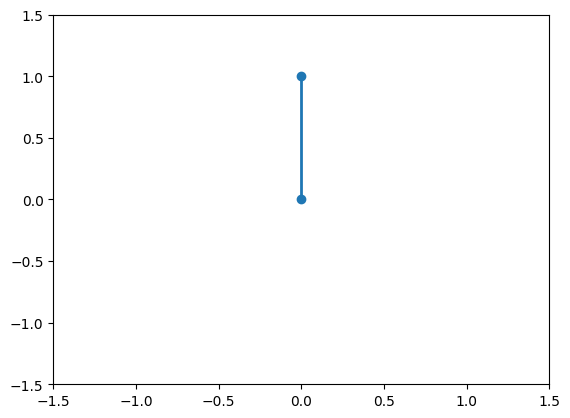

In [22]:
# Función de animación
def animate(i):
    line.set_data([0, np.sin(y_zn[i])], [0, np.cos(y_zn[i])])
    return line,

# Crear la figura y los ejes
fig, ax = plt.subplots()
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)

# Inicializar la línea para la animación
line, = ax.plot([], [], 'o-', lw=2)

# Crear la animación
ani = animation.FuncAnimation(fig, animate, frames=len(y_zn), interval=50, blit=True)

# Mostrar la animación
plt.show()

HTML(ani.to_html5_video())

Podemos ver que se estabiliza pero en vez de verticalmente, se estabiliza un poco inclinado.

## **3. REFERENCIAS**

[1] Aguirre Hernández, B., Loredo Villalobos, C. A., Díaz González, E. C., & Campos Cantón, E. (2017). *Estabilidad de sistemas por medio de polinomios Hurwitz*.

[2] Meshram, P. M., & Kanojiya, R. G. (2012, March). *Tuning of PID controller using Ziegler-Nichols method for speed control of DC motor*. En IEEE-international conference on advances in engineering, science and management (ICAESM-2012) (pp. 117-122). IEEE.

[3] George Ellis, en *Control System Design Guide (Fourth Edition)*, 2012

[4]Sergio Andrés Castaño Giraldo, en *Sintonía de Control PID usando Ziegler - Nichols*.

[5] https://controlautomaticoeducacion.com/control-realimentado/ziegler-nichols-sintonia-de-control-pid/#Ziegler_y_Nichols_-_Metodo_2_Lazo_Cerrado

[6] Triviño Macías, L. G. (2020). *Modelado, simulación y control de un péndulo invertido*.